In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("C:/Users/lavis/Downloads/Salary Data.csv")
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [4]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [5]:
df[['Years of Experience', 'Age', 'Salary']].isna().sum()

Years of Experience    2
Age                    2
Salary                 2
dtype: int64

In [6]:
df = df[['Years of Experience', 'Age', 'Salary']].dropna()
df[['Years of Experience', 'Age', 'Salary']].isna().sum()

Years of Experience    0
Age                    0
Salary                 0
dtype: int64

In [7]:
X = df[['Years of Experience', 'Age']].values
y = df['Salary'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [10]:
X_train_b = np.c_[np.ones((X_train_norm.shape[0], 1)), X_train_norm]
X_test_b = np.c_[np.ones((X_test_norm.shape[0], 1)), X_test_norm]

In [36]:
def gradient_descent(X, y, lr=0.01, n_iter=1000):
    m = len(y)
    theta = np.random.randn(X.shape[1])
    loss_history = []
    
    for i in range(n_iter):
        predictions = X.dot(theta)
        error = predictions - y
        gradients = 2/m * X.T.dot(error)
        theta -= lr * gradients
        if i % 100 == 0:
            print(f"Iteration {i}, Loss: {np.mean(error**2):.2f}")
        loss_history.append(np.mean(error**2))
    return theta, loss_history

In [37]:
theta, losses = gradient_descent(X_train_b, y_train, lr=0.005)

Iteration 0, Loss: 12321016436.56
Iteration 100, Loss: 1695832424.55
Iteration 200, Loss: 497469610.17
Iteration 300, Loss: 341022654.33
Iteration 400, Loss: 320121140.94
Iteration 500, Loss: 317306387.81
Iteration 600, Loss: 316914152.31
Iteration 700, Loss: 316847054.93
Iteration 800, Loss: 316824090.51
Iteration 900, Loss: 316807588.08


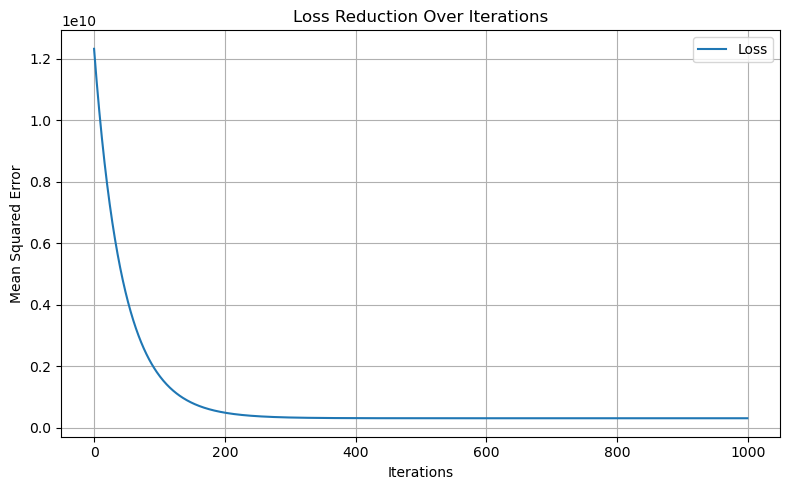

In [38]:
plt.figure(figsize=(8, 5))
plt.plot(losses, label="Loss")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.title("Loss Reduction Over Iterations")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [39]:
y_pred = X_test_b.dot(theta)

In [40]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("R2 Score:",r2)
print("MAE:",mae)

R2 Score: 0.8853668250842639
MAE: 12440.467177769111


In [41]:
comparison_df = pd.DataFrame(X_test, columns=["Experience", "Age"])

y_test_flat = y_test.flatten() 
y_pred_flat = y_pred.flatten()

comparison_df["Actual_Salary"] = y_test_flat
comparison_df["Predicted_Salary"] = y_pred_flat

print("Sample Comparison of Predictions:")
comparison_df.sample(10)

Sample Comparison of Predictions:


,Experience,Age,Actual_Salary,Predicted_Salary
10,13.0,42.0,140000.0,124468.000837
33,15.0,44.0,150000.0,137729.586484
50,19.0,45.0,180000.0,154990.133250
38,18.0,43.0,140000.0,145271.798918
21,9.0,37.0,105000.0,94857.288035
43,19.0,48.0,170000.0,164252.757777
3,6.0,34.0,80000.0,74964.909565
39,4.0,31.0,50000.0,58615.782409
26,18.0,46.0,160000.0,154534.423445
4,17.0,43.0,140000.0,141728.547603
